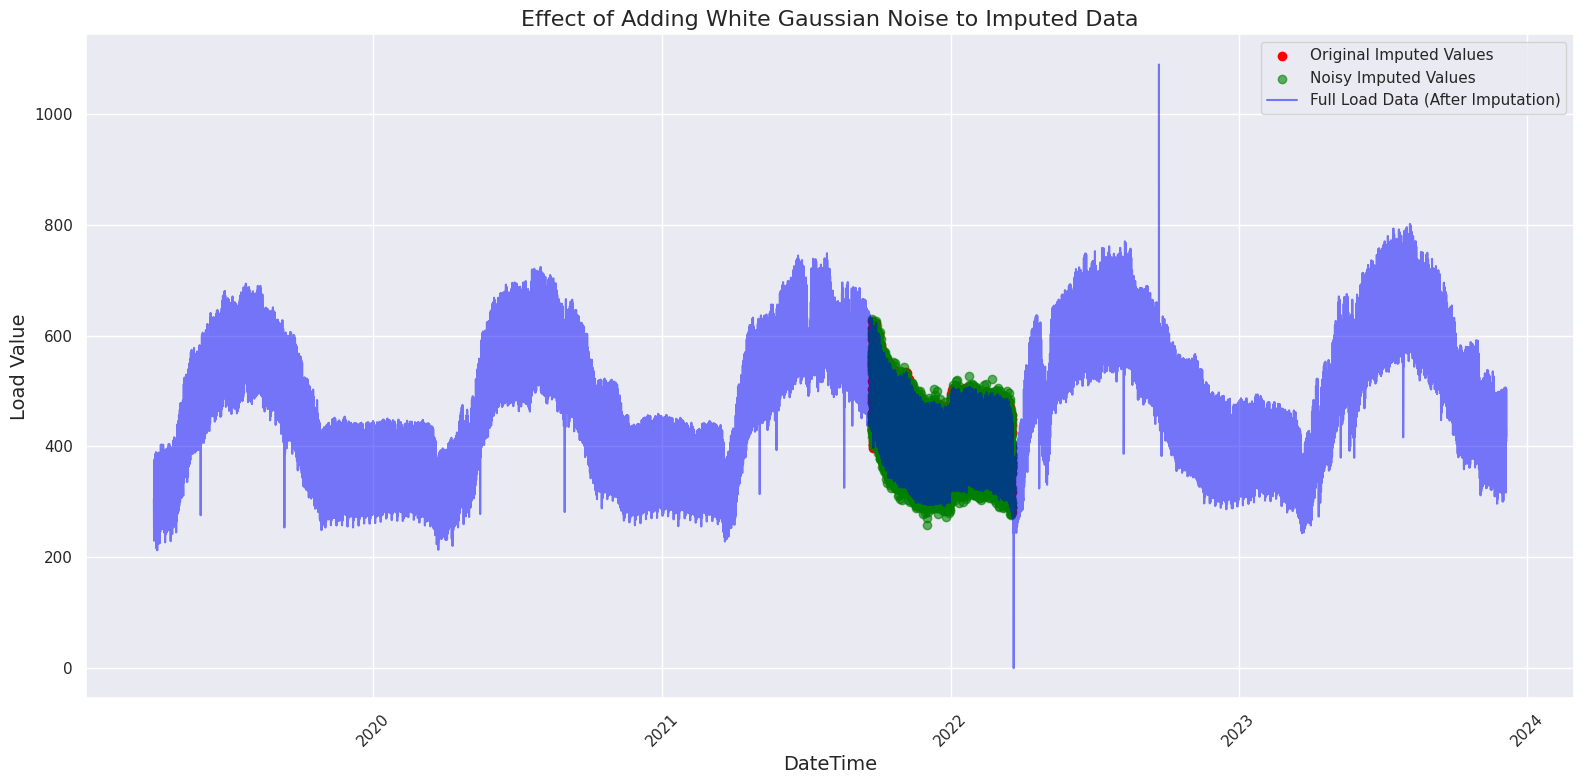

✅ White Gaussian noise added to imputed values (σ = 9.9849) and saved to 'filled_data_with_noisy_imputed.csv'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv('filled_data_imp.csv')  # Full dataset after imputation
imputed_data = pd.read_csv('imputed_data.csv')  # Only imputed values

# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
imputed_data['DateTime'] = pd.to_datetime(imputed_data['DateTime'])

# Create a mask to identify imputed rows
imputed_mask = df['DateTime'].isin(imputed_data['DateTime'])

# Compute standard deviation of imputed Load values
std_dev_imputed = imputed_data['Load'].std()

# Set noise level (e.g., 2% of the standard deviation of imputed values)
noise_level = 0.15  # Adjust this value as needed
noise = np.random.normal(0, noise_level * std_dev_imputed, size=imputed_mask.sum())

# Create a copy for visualization before applying noise
df_noisy = df.copy()

# Apply noise only to imputed values
df_noisy.loc[imputed_mask, 'Load'] += noise



# Visualization
sns.set(style="darkgrid")
plt.figure(figsize=(16, 8))

# Original imputed values (red)
plt.scatter(imputed_data['DateTime'], imputed_data['Load'], color='red', label='Original Imputed Values', marker='o')

# Noisy imputed values (green)
plt.scatter(imputed_data['DateTime'], df_noisy.loc[imputed_mask, 'Load'], color='green', label='Noisy Imputed Values', marker='o', alpha=0.6)

# Full dataset plot (blue)
plt.plot(df['DateTime'], df['Load'], color='blue', alpha=0.5, label='Full Load Data (After Imputation)')

# Labels and title
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Load Value', fontsize=14)
plt.title('Effect of Adding White Gaussian Noise to Imputed Data', fontsize=16)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

print(f"✅ White Gaussian noise added to imputed values (σ = {noise_level * std_dev_imputed:.4f}) and saved to 'filled_data_with_noisy_imputed.csv'.")


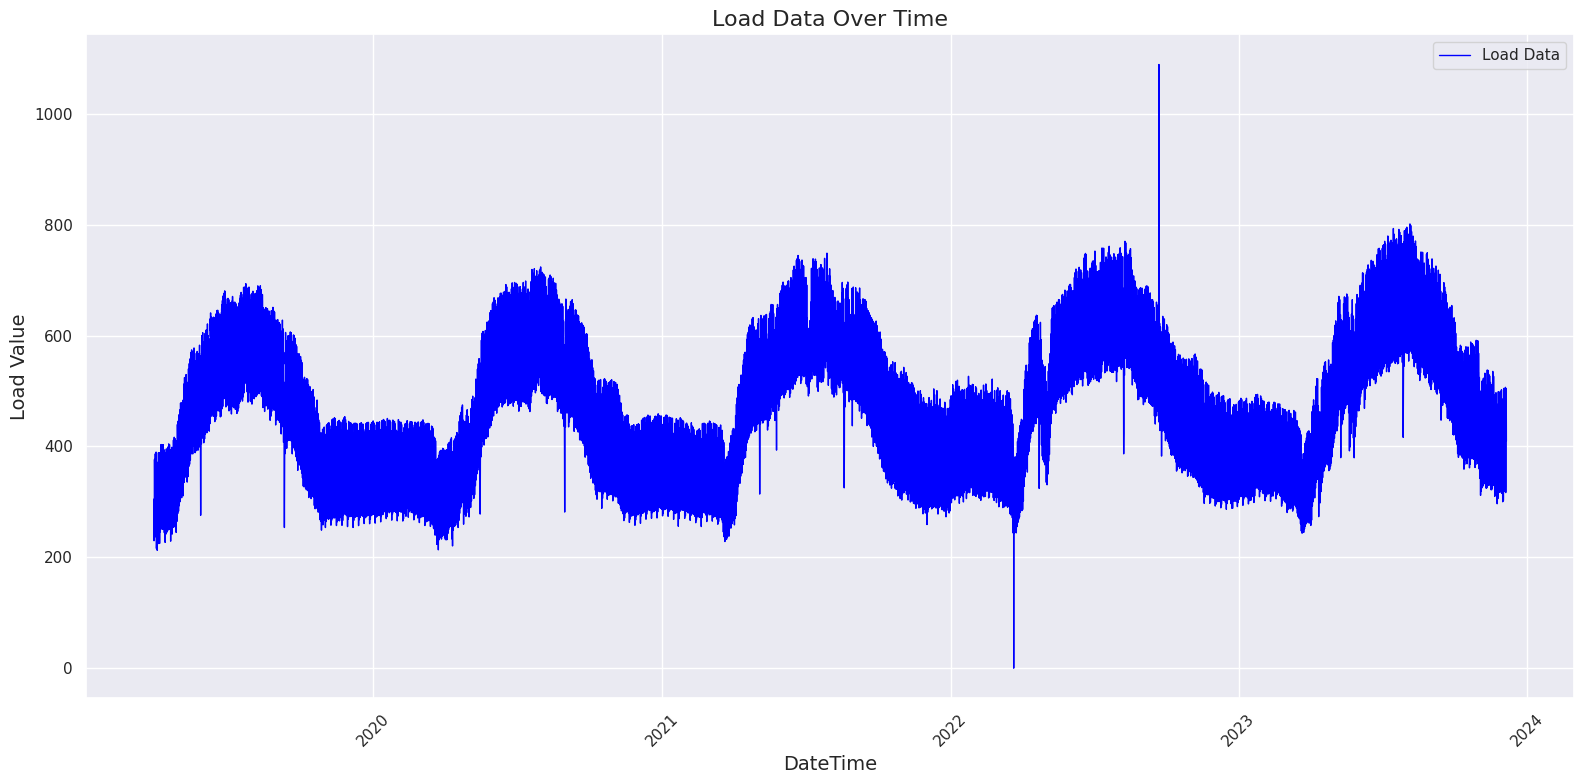

In [2]:

# Convert DateTime column to datetime format
df_noisy['DateTime'] = pd.to_datetime(df_noisy['DateTime'])

# Set the plot style
sns.set(style="darkgrid")

# Create a figure
plt.figure(figsize=(16, 8))

# Plot the Load data
plt.plot(df_noisy['DateTime'], df_noisy['Load'], color='blue', linewidth=1, label='Load Data')

# Add labels and title
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Load Value', fontsize=14)
plt.title('Load Data Over Time', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [3]:
std_before = imputed_data['Load'].std()  # Before adding noise
std_after = df_noisy.loc[imputed_mask, 'Load'].std()  # After adding noise


# Ensure both series have no NaN values and same index
imputed_load_original = imputed_data['Load'].dropna().reset_index(drop=True)
imputed_load_noisy = df_noisy.loc[imputed_mask, 'Load'].dropna().reset_index(drop=True)

# Recalculate MAE
mae = np.mean(np.abs(imputed_load_original - imputed_load_noisy))



print(f"📊 Standard Deviation Before Noise: {std_before:.4f}")
print(f"📊 Standard Deviation After Noise: {std_after:.4f}")
print(f"📊 Percentage Increase: {((std_after - std_before) / std_before) * 100:.2f}%")
print(f"📊 Mean Absolute Error (MAE): {mae:.4f}")


📊 Standard Deviation Before Noise: 66.5661
📊 Standard Deviation After Noise: 67.4541
📊 Percentage Increase: 1.33%
📊 Mean Absolute Error (MAE): 7.8235


In [4]:
# Save the dataset with noisy imputed values
df_noisy.to_csv('filled_data_with_noisy_imputed.csv', index=False)




## **📌 Mathematical Process of Adding White Gaussian Noise**

### **🔹 Step 1: Identify Imputed Values**
We create a mask to select only the imputed values:

$$
\text{mask} = (\text{DateTime} \in \text{imputed dataset})
$$

---

### **🔹 Step 2: Compute Standard Deviation**
Standard deviation (\(\sigma_{\text{imputed}}\)) of the imputed values:

$$
\sigma_{\text{imputed}} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (X_i - \mu)^2}
$$

where:
- \( X_i \) = imputed Load values,
- \( \mu \) = mean of imputed Load values,
- \( N \) = number of imputed values.

---

### **🔹 Step 3: Generate Gaussian Noise**
We add **Gaussian noise** with mean **0** and standard deviation:

$$
\text{Noise} \sim \mathcal{N}(0, \text{noise\_level} \times \sigma_{\text{imputed}})
$$

Each imputed value is updated as:

$$
X_{\text{noisy}} = X_{\text{imputed}} + \text{Noise}
$$

---

### **🔹 Step 4: Apply Noise to Imputed Values Only**
$$
X_{\text{final}} =
\begin{cases}
X_{\text{noisy}}, & \text{if imputed} \\
X_{\text{original}}, & \text{otherwise}
\end{cases}
$$

---

### **🔹 Step 5: Measure the Effect of Noise**
#### **1️⃣ Standard Deviation Change**
$$
\% \text{Change} = \frac{\sigma_{\text{after}} - \sigma_{\text{before}}}{\sigma_{\text{before}}} \times 100
$$

#### **2️⃣ Mean Absolute Error (MAE)**
$$
\text{MAE} = \frac{1}{N} \sum_{i=1}^{N} \left| X_{\text{imputed}, i} - X_{\text{noisy}, i} \right|
$$

---
